In [1]:
# Importing things 
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import matplotlib.ticker as mticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import ScalarFormatter

import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

from scipy.ndimage import gaussian_filter

from matplotlib.gridspec import GridSpec

## Plotting preferences

In [2]:
# Font sizes
axis_label_font = 30
axis_numbers_font = 25
title_font = 50
legend_font = 50

detection_colours = sns.color_palette("hls", 4)
dark_colours = sns.color_palette("viridis", 8)
my_colours = sns.color_palette("husl", 8)

cmap_reds = ListedColormap(plt.cm.get_cmap('Reds', 10)(np.arange(10)))
cmap_greens = ListedColormap(plt.cm.get_cmap('Greens', 10)(np.arange(10)))
cmap_purples = ListedColormap(plt.cm.get_cmap('Purples', 10)(np.arange(10)))

alpha = 0.7

path = '/Users/audreyburggraf/Desktop/THESIS/Figures/'

## Data 

In [3]:
# Importing data file 
df = pd.read_csv('/Users/audreyburggraf/Desktop/THESIS/Data Files/bigrun_10000_after_changes.csv')
df

,Inj.0P alpha0,Inj.0P delta0,Inj.0P pmra,Inj.0P pmdec,Inj.0P prlx,Inj.1P alpha0,Inj.1P delta0,Inj.1P pmra,Inj.1P pmdec,Inj.1P prlx,...,Condition 4,Detection,Astrometric Signature,Stellar Mass,Scaling Factor,Distance,Semi-Major Axis,Sigma fov,Noise,S/N
0,288.503923,-68.088209,-44.551743,-37.022875,10.061523,288.503923,-68.088209,-44.551743,-37.022875,10.061523,...,0,0,56.262094,0.154116,1.272583,99.388534,1.136793,333.149854,471.145042,0.151966
1,138.039973,-3.377097,-163.019718,-32.490641,11.956663,138.039973,-3.377097,-163.019718,-32.490641,11.956663,...,0,0,1.022224,0.302706,10.244061,83.635376,0.088245,96.705137,136.761717,0.076569
2,286.695890,-0.244781,-3.752077,-4.259140,10.096390,286.695890,-0.244781,-3.752077,-4.259140,10.096390,...,0,0,18.653842,0.078149,21.004269,99.045303,0.021571,427.687033,604.840802,0.647791
3,115.135052,0.740534,26.853094,-84.685793,10.182806,115.135052,0.740534,26.853094,-84.685793,10.182806,...,0,0,36.973503,0.386243,3.250046,98.204759,0.442331,91.103628,128.839986,0.932673
4,262.038776,-14.041731,3.605326,-100.931148,17.001777,262.038776,-14.041731,3.605326,-100.931148,17.001777,...,0,0,0.974203,0.440679,16.434061,58.817380,0.053255,42.230649,59.723156,0.268072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,282.780442,12.718451,8.229683,-11.514563,11.754215,282.780442,12.718451,8.229683,-11.514563,11.754215,...,0,0,223.892367,0.073716,1.132350,85.075868,1.038787,642.528879,908.673054,0.279005
9996,24.961276,20.537176,47.458743,-84.013850,16.444935,24.961276,20.537176,47.458743,-84.013850,16.444935,...,0,0,17.471990,0.519612,3.435857,60.808996,0.453412,38.329614,54.206261,1.107460
9997,174.263014,-4.139514,20.895641,-87.415298,12.324102,174.263014,-4.139514,20.895641,-87.415298,12.324102,...,0,0,9.774783,0.175999,18.785303,81.141817,0.032814,167.592378,237.011414,0.774740
9998,288.104504,-29.673692,5.719830,-123.392905,11.458365,288.104504,-29.673692,5.719830,-123.392905,11.458365,...,0,0,7.164172,0.263144,11.641484,87.272488,0.071018,113.439746,160.428028,0.519869


In [4]:
df.columns

Index(['Inj.0P alpha0', 'Inj.0P delta0', 'Inj.0P pmra', 'Inj.0P pmdec',
       'Inj.0P prlx', 'Inj.1P alpha0', 'Inj.1P delta0', 'Inj.1P pmra',
       'Inj.1P pmdec', 'Inj.1P prlx', 'Inj.1P e', 'Inj.1P omega',
       'Inj.1P Omega', 'Inj.1P cosi', 'Inj.1P log(m_p)', 'Inj.1P log(P)',
       'Inj.1P tp', 'Rec.0P alpha0', 'Rec.0P delta0', 'Rec.0P pmra',
       'Rec.0P pmdec', 'Rec0P prlx', 'Rec.1P alpha0', 'Rec.1P delta0',
       'Rec.1P pmra', 'Rec.1P pmdec', 'Rec.1P prlx', 'Rec.1P e',
       'Rec.1P omega', 'Rec.1P Omega', 'Rec.1P cosi', 'Rec.1P log(m_p)',
       'Rec.1P log(P)', 'Rec.1P tp', 'np_chi_sq', 'wp_chi_sq', 'npBIC',
       'wpBIC', 'DeltaBIC', 'Condition 1', 'Condition 2', 'Condition 3',
       'Condition 4', 'Detection', 'Astrometric Signature', 'Stellar Mass',
       'Scaling Factor', 'Distance', 'Semi-Major Axis', 'Sigma fov', 'Noise',
       'S/N'],
      dtype='object')

## Planetary Mass and Orbital Period 

##### Bins
- Mass bins are in units of $M_J$
- Period bins are in units of years
- The bins are evenly spaced in logspace

In [5]:
# Setting the mass and period bins 
Mbins = np.logspace(np.log10(0.3), np.log10(13), 20) 
Pbins = np.logspace(-2, 1, 20) 

# Number of bins 
num_Pbins = len(Pbins) - 1
num_Mbins = len(Mbins) - 1

# Midpoints of the bins 
Mbin_midpoints = (Mbins[:-1] + Mbins[1:]) / 2
Pbin_midpoints = (Pbins[:-1] + Pbins[1:]) / 2

In [6]:
# Data in non-log units
inj_mass_data   = 10**df['Inj.1P log(m_p)'] # [M_J]
inj_period_data = 10**df['Inj.1P log(P)'] # [years]
detection_data = df['Detection']

In [8]:
df['Detection'].mean()

0.1536

In [9]:
df['Detection'].sum()

1536

In [14]:
N_values = [1,2,3,4,5,6,7,8,9,10,11,12]  # Example values for N (fraction)
n_values = Pbins#[0.01, 0.1, 1, 2, 3,4,5,6,7,8,9]  # Example values for n (years)

sensitivity_data = []

# Iterate over each combination of N and n
for N in N_values:
    sensitivity_values = []
    for n in n_values:
        # Filter the DataFrame based on the current values of N and n
        filtered_df = df[(inj_mass_data >= N - 0.1) & (inj_mass_data <= N + 0.1) & (inj_period_data > n)]

        # Calculate sensitivity as the fraction of detected samples
        num_detected = filtered_df['Detection'].sum()
        num_samples = len(filtered_df)
        sensitivity = num_detected / num_samples

        sensitivity_values.append(sensitivity)
    sensitivity_data.append(sensitivity_values)

/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_72394/3868106203.py:16: RuntimeWarning: invalid value encountered in long_scalars
  sensitivity = num_detected / num_samples


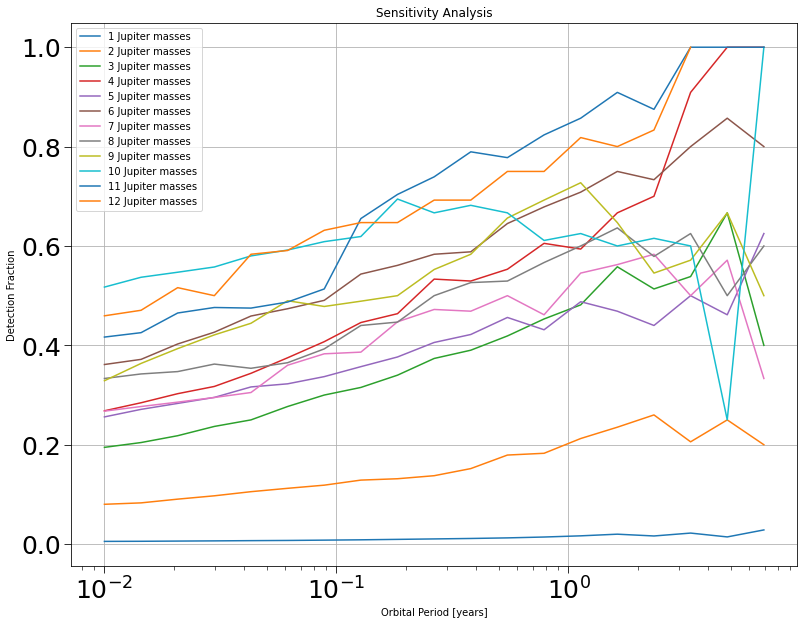

In [17]:
fig, ax = plt.subplots(figsize=(13, 10))

for N, sensitivity_values in zip(N_values, sensitivity_data):
    ax.plot(n_values, sensitivity_values, label=f"{N} Jupiter masses")

ax.set_xlabel('Orbital Period [years]')
ax.set_ylabel('Detection Fraction')
ax.set_title('Sensitivity Analysis')

ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


ax.set_xscale('log')

ax.legend()
plt.grid(True)
plt.show()